# Customer Churn Prediction Using Artificial Neural Networks (ANN)

This notebook demonstrates how to use Artificial Neural Networks (ANNs) to predict customer churn. Customer churn refers to the phenomenon where customers stop doing business with a company. Predicting churn is essential for businesses as it allows them to identify customers at risk of leaving and take proactive measures to retain them.

In this notebook, we'll follow these steps:
1. **Data Loading and Exploration**: Load the dataset and explore its features and distribution.
2. **Data Preprocessing**: Prepare the data for training by handling missing values, encoding categorical variables, and scaling numerical features.
3. **Model Building**: Construct an ANN model using TensorFlow and Keras.
4. **Model Training**: Train the ANN model on the training data.
5. **Model Evaluation**: Evaluate the performance of the trained model on the test data using metrics such as accuracy and confusion matrix.
6. **Conclusion**: Summarize the findings and discuss potential next steps for improving the model.

Let's dive in!


In [58]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder


# DataSet
using "**Telco-Customer-Churn**" from kaggle

In [87]:
df=pd.read_csv("Telco-Customer-Churn.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [60]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [61]:
df.drop('customerID' , axis='columns' , inplace=True )

In [62]:
pd.to_numeric(df.TotalCharges , errors='coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [63]:
df[pd.to_numeric(df.TotalCharges , errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [64]:
df1=df[df.TotalCharges!=' ']
df1.shape
df1

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [65]:
df1.TotalCharges=pd.to_numeric(df1.TotalCharges , errors='coerce')

<ipython-input-65-83c601f0a9eb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.TotalCharges=pd.to_numeric(df1.TotalCharges , errors='coerce')


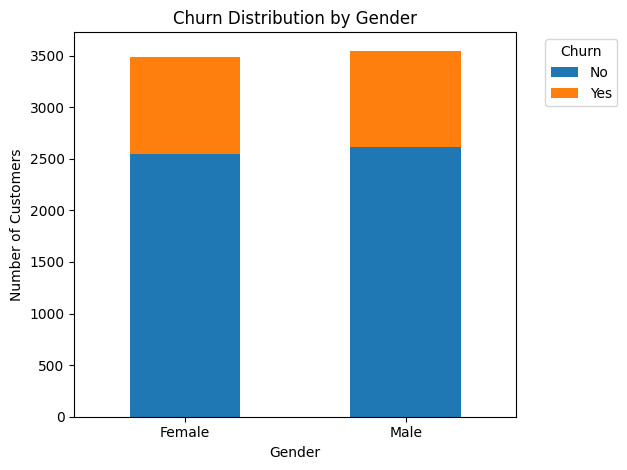

In [66]:
gender_churn = df1.groupby(['gender', 'Churn']).size().unstack()

# Plotting
gender_churn.plot(kind='bar', stacked=True)
plt.title('Churn Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
plt.legend(title='Churn', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

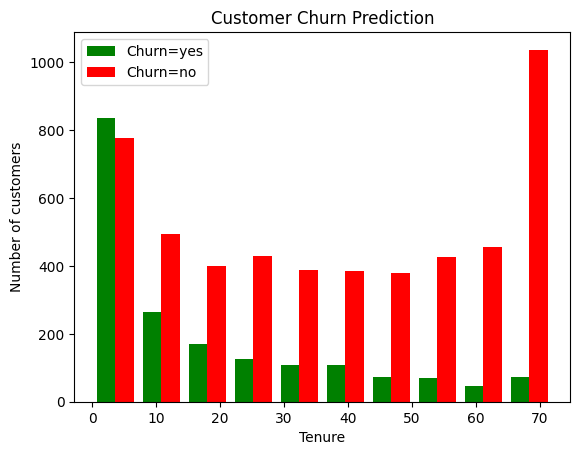

In [67]:
churned_customers_yes = df[df['Churn'] == 'Yes'].tenure
churned_customers_no = df[df['Churn'] == 'No'].tenure
plt.hist([churned_customers_yes, churned_customers_no], color=['green', 'red'], label=['Churn=yes', 'Churn=no'])
plt.xlabel("Tenure")
plt.ylabel("Number of customers")
plt.title("Customer Churn Prediction")
plt.legend()
plt.show()

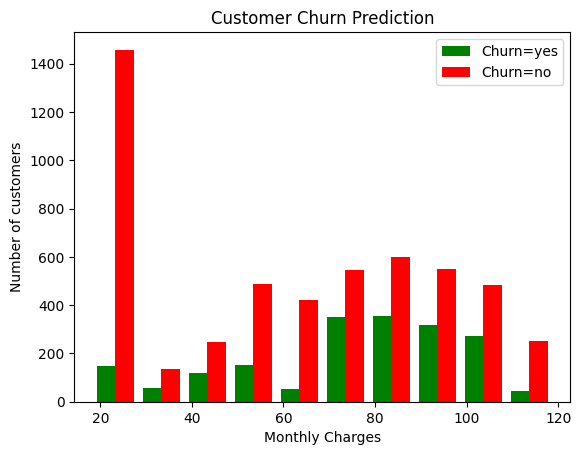

In [68]:
churned_customers_yes = df[df['Churn'] == 'Yes'].MonthlyCharges
churned_customers_no = df[df['Churn'] == 'No'].MonthlyCharges
plt.hist([churned_customers_yes, churned_customers_no], color=['green', 'red'], label=['Churn=yes', 'Churn=no'])
plt.xlabel("Monthly Charges")
plt.ylabel("Number of customers")
plt.title("Customer Churn Prediction")
plt.legend()
plt.show()

## Label Encoding and Data Cleaning

Before training our model, it's essential to preprocess the data. This involves handling any missing values, encoding categorical variables, and ensuring all features are in a suitable format for the model.

### Handling Missing Values

First, we'll check for any missing values in the dataset and handle them appropriately. This ensures that our model can learn from the complete dataset without being affected by missing data.

### Label Encoding

Many machine learning algorithms, including neural networks, require numerical input. Therefore, we'll encode categorical variables into numerical format using label encoding. This transformation ensures that categorical variables can be used as input features for the model.

### Data Cleaning

In addition to handling missing values and encoding categorical variables, we'll perform any necessary data cleaning steps. This may include removing unnecessary columns, standardizing data formats, or handling outliers.

Let's proceed with these preprocessing steps to prepare our data for training the neural network.


In [69]:
def unique_value(df):
  for column in df:
    if df[column].dtypes == 'object':
      print(f'{column}:{df[column].unique()}')

In [70]:
unique_value(df1)

gender:['Female' 'Male']
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
PhoneService:['No' 'Yes']
MultipleLines:['No phone service' 'No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes' 'No internet service']
OnlineBackup:['Yes' 'No' 'No internet service']
DeviceProtection:['No' 'Yes' 'No internet service']
TechSupport:['No' 'Yes' 'No internet service']
StreamingTV:['No' 'Yes' 'No internet service']
StreamingMovies:['No' 'Yes' 'No internet service']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn:['No' 'Yes']


In [71]:
df1.replace('No internet service','No',inplace=True)
df1.replace('No phone service','No',inplace=True)
unique_value(df1)

gender:['Female' 'Male']
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
PhoneService:['No' 'Yes']
MultipleLines:['No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes']
OnlineBackup:['Yes' 'No']
DeviceProtection:['No' 'Yes']
TechSupport:['No' 'Yes']
StreamingTV:['No' 'Yes']
StreamingMovies:['No' 'Yes']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn:['No' 'Yes']


<ipython-input-71-23c3bb029783>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No internet service','No',inplace=True)
<ipython-input-71-23c3bb029783>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No phone service','No',inplace=True)


In [72]:
columns_to_modify = ['Partner','PaperlessBilling','Dependents','PhoneService','MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
for col in columns_to_modify:
    if df1[col].dtype == 'object':
        df1[col].replace({'Yes': 1, 'No': 0}, inplace=True)


<ipython-input-72-c1765583af0d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col].replace({'Yes': 1, 'No': 0}, inplace=True)


In [73]:
print(df1.columns)


Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


In [74]:
df1['gender'].replace({"Male":1,"Female":0},inplace=True)

<ipython-input-74-c9ae5f270aea>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['gender'].replace({"Male":1,"Female":0},inplace=True)


In [75]:

columns_to_encode = ['InternetService', 'Contract', 'PaymentMethod']

df1 = pd.get_dummies(data=df1, columns=columns_to_encode)


In [76]:
df1.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                       object
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [77]:
column_scale=['tenure','MonthlyCharges','TotalCharges']
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df1[column_scale] = scaler.fit_transform(df1[column_scale])

**Train test Split**

In [78]:
X = df1.drop('Churn', axis=1)
y = df1['Churn']

# Use LabelEncoder to convert 'Churn' column to numerical labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)



In [79]:
X_train.isnull().sum()
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [80]:
X_train.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                     float64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No                           uint8
Contract_Month-to-month        

# prompt: write markdown for model

# **Model Building**

Now that we have preprocessed our data, we can start building our ANN model. We'll use TensorFlow and Keras to construct a multi-layer neural network for predicting customer churn.

**Model Architecture:**

Our model will consist of the following layers:

- Input layer: Accepts the preprocessed features from the data.
- Hidden layers: We'll use multiple hidden layers with varying sizes to learn complex patterns in the data.
- Output layer: Produces a single output node representing the predicted churn probability (between 0 and 1).

**Activation Functions:**

- We'll use the `relu` activation function for the hidden layers.
- The output layer will use the `sigmoid` activation function to provide a probability score between 0 and 1.

**Loss Function and Optimizer:**

- We'll use the `binary_crossentropy` loss function to measure the model's performance.
- The `adam` optimizer will be used to update the model's weights during training.

**Metrics:**

- We'll track the model's performance using the `accuracy` metric, which measures the percentage of correctly predicted churn cases.

**Training:**

- The model will be trained for a specified number of epochs (iterations) using the training data.
- During training, the model will learn to adjust its weights to minimize the loss function.

**Evaluation:**

- After training, the model will be evaluated on the test data to assess its ability to predict churn.
- We'll use the `accuracy` metric to evaluate the model's performance on the test data.

By following these steps, we can build a robust ANN model for predicting customer churn.

In [88]:
model = keras.models.Sequential([
    keras.layers.Dense(20, input_shape=(X_train.shape[1],), activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100)


Epoch 1/100
165/165 [==============================] - 1s 3ms/step - loss: 0.5121 - accuracy: 0.7448
Epoch 2/100
165/165 [==============================] - 0s 2ms/step - loss: 0.4388 - accuracy: 0.7903
Epoch 3/100
165/165 [==============================] - 0s 2ms/step - loss: 0.4274 - accuracy: 0.7931
Epoch 4/100
165/165 [==============================] - 0s 2ms/step - loss: 0.4230 - accuracy: 0.7975
Epoch 5/100
165/165 [==============================] - 0s 2ms/step - loss: 0.4192 - accuracy: 0.7996
Epoch 6/100
165/165 [==============================] - 0s 2ms/step - loss: 0.4170 - accuracy: 0.8005
Epoch 7/100
165/165 [==============================] - 0s 2ms/step - loss: 0.4149 - accuracy: 0.8041
Epoch 8/100
165/165 [==============================] - 0s 2ms/step - loss: 0.4135 - accuracy: 0.8038
Epoch 9/100
165/165 [==============================] - 0s 3ms/step - loss: 0.4124 - accuracy: 0.8043
Epoch 10/100
165/165 [==============================] - 0s 2ms/step - loss: 0.4109 - accura

In [89]:
model.evaluate(X_test , y_test)

55/55 [==============================] - 0s 1ms/step - loss: 0.4687 - accuracy: 0.7929


[0.46873530745506287, 0.7929465174674988]

In [90]:
 yp=model.predict(X_test)
 yp[:5]

55/55 [==============================] - 0s 4ms/step


array([[0.24032916],
       [0.04922009],
       [0.10973892],
       [0.7924579 ],
       [0.8707646 ]], dtype=float32)

In [91]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

y_pred[:10]



[0, 0, 0, 1, 1, 0, 0, 1, 0, 0]

In [85]:
y_pred[:10]

[0, 0, 0, 1, 1, 0, 0, 1, 0, 0]

**Confusion Matrix**

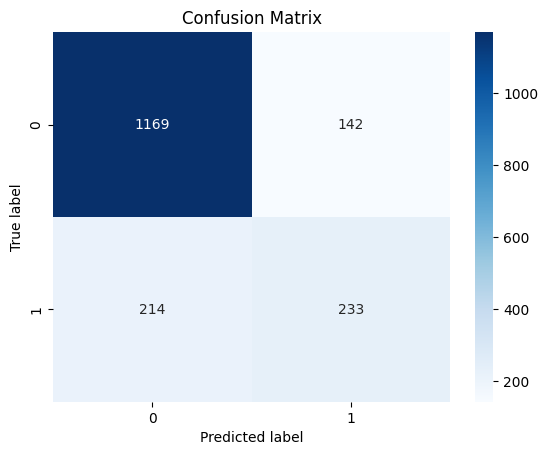

In [86]:

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion Matrix")
plt.show()
